In [54]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('kddcup.data_10_percent_splited.csv').drop(columns = 'Unnamed: 0')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,type_is_back.,type_is_imap.,type_is_satan.,type_is_phf.,type_is_nmap.,type_is_multihop.,type_is_warezmaster.,type_is_warezclient.,type_is_spy.,type_is_rootkit.
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type,protocol_type_is_tcp,protocol_type_is_udp,protocol_type_is_icmp,service_is_http,service_is_smtp,service_is_finger,service_is_domain_u,service_is_auth,service_is_telnet,service_is_ftp,service_is_eco_i,service_is_ntp_u,service_is_ecr_i,service_is_other,service_is_private,service_is_pop_3,service_is_ftp_data,service_is_rje,service_is_time,service_is_mtp,service_is_link,service_is_remote_job,service_is_gopher,service_is_ssh,service_is_name,service_is_whois,service_is_domain,service_is_login,service_is_imap4,service_is_daytime,service_is_ctf,service_is_nntp,service_is_shell,service_is_IRC,service_is_nnsp,service_is_http_443,service_is_exec,service_is_printer,service_is_efs,service_is_courier,service_is_uucp,service_is_klogin,service_is_kshell,service_is_echo,service_is_discard,service_is_systat,service_is_supdup,service_is_iso_tsap,service_is_hostnames,service_is_csnet_ns,service_is_pop_2,service_is_sunrpc,service_is_uucp_path,service_is_netbios_ns,service_is_netbios_ssn,service_is_netbios_dgm,service_is_sql_net,service_is_vmnet,service_is_bgp,service_is_Z39_50,service_is_ldap,service_is_netstat,service_is_urh_i,service_is_X11,service_is_urp_i,service_is_pm_dump,service_is_tftp_u,service_is_tim_i,service_is_red_i,flag_is_SF,flag_is_S1,flag_is_REJ,flag_is_S2,flag_is_S0,flag_is_S3,flag_is_RSTO,flag_is_RSTR,flag_is_RSTOS0,flag_is_OTH,flag_is_SH,type_is_normal.,type_is_buffer_overflow.,type_is_loadmodule.,type_is_perl.,type_is_neptune.,type_is_smurf.,type_is_guess_passwd.,type_is_pod.,type_is_teardrop.,type_is_portsweep.,type_is_ipsweep.,type_is_land.,type_is_ftp_write.,type_is_back.,type_is_imap.,type_is_satan.,type_is_phf.,type_is_nmap.,type_is_multihop.,type_is_warezmaster.,type_is_warezclient.,type_is_spy.,type_is_rootkit.
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
type_list = []
for col in df:
    if 'type_is' in col and 'protocol_type_is' not in col:
        type_list.append(col)
type_list

['type_is_normal.',
 'type_is_buffer_overflow.',
 'type_is_loadmodule.',
 'type_is_perl.',
 'type_is_neptune.',
 'type_is_smurf.',
 'type_is_guess_passwd.',
 'type_is_pod.',
 'type_is_teardrop.',
 'type_is_portsweep.',
 'type_is_ipsweep.',
 'type_is_land.',
 'type_is_ftp_write.',
 'type_is_back.',
 'type_is_imap.',
 'type_is_satan.',
 'type_is_phf.',
 'type_is_nmap.',
 'type_is_multihop.',
 'type_is_warezmaster.',
 'type_is_warezclient.',
 'type_is_spy.',
 'type_is_rootkit.']

Chi square test:

In [115]:
corr_features = pd.DataFrame(columns = type_list, index = df.columns)

corr_features

,type_is_normal.,type_is_buffer_overflow.,type_is_loadmodule.,type_is_perl.,type_is_neptune.,type_is_smurf.,type_is_guess_passwd.,type_is_pod.,type_is_teardrop.,type_is_portsweep.,type_is_ipsweep.,type_is_land.,type_is_ftp_write.,type_is_back.,type_is_imap.,type_is_satan.,type_is_phf.,type_is_nmap.,type_is_multihop.,type_is_warezmaster.,type_is_warezclient.,type_is_spy.,type_is_rootkit.
duration,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protocol_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
k=0
for type_cat in type_list:
    for feature in df.columns:
        contingency_table = pd.crosstab(df[feature], df[type_cat], margins = True)
        f_obs = []
        for i in range(contingency_table.shape[0]):
            f_obs.append(contingency_table.iloc[i][:].values)
        f_obs = np.array(f_obs)
        p_value = stats.chi2_contingency(f_obs)[1]
        if p_value<0.001:
            print(k,'p-value of '+str(feature)+' and '+type_cat+' is '+str(p_value))
            corr_features[type_cat][feature] = 1
            k+=1

0 p-value of duration and type_is_normal. is 0.0
1 p-value of protocol_type and type_is_normal. is 0.0
2 p-value of service and type_is_normal. is 0.0
3 p-value of flag and type_is_normal. is 0.0
4 p-value of src_bytes and type_is_normal. is 0.0
5 p-value of dst_bytes and type_is_normal. is 0.0
6 p-value of wrong_fragment and type_is_normal. is 9.755577012763848e-63
7 p-value of hot and type_is_normal. is 0.0
8 p-value of logged_in and type_is_normal. is 0.0
9 p-value of num_compromised and type_is_normal. is 1.0449805209382245e-104
10 p-value of su_attempted and type_is_normal. is 4.898540812008598e-07
11 p-value of num_root and type_is_normal. is 0.0
12 p-value of num_file_creations and type_is_normal. is 2.7748960593107714e-149
13 p-value of num_shells and type_is_normal. is 1.2443309562713807e-29
14 p-value of num_access_files and type_is_normal. is 0.0
15 p-value of is_guest_login and type_is_normal. is 3.1526560079889106e-110
16 p-value of count and type_is_normal. is 0.0
17 p-va

120 p-value of src_bytes and type_is_buffer_overflow. is 0.0
121 p-value of dst_bytes and type_is_buffer_overflow. is 0.0
122 p-value of hot and type_is_buffer_overflow. is 0.0
123 p-value of logged_in and type_is_buffer_overflow. is 3.2324094810727616e-36
124 p-value of num_compromised and type_is_buffer_overflow. is 0.0
125 p-value of root_shell and type_is_buffer_overflow. is 0.0
126 p-value of num_root and type_is_buffer_overflow. is 0.0
127 p-value of num_file_creations and type_is_buffer_overflow. is 0.0
128 p-value of rerror_rate and type_is_buffer_overflow. is 2.3309151690435908e-34
129 p-value of dst_host_count and type_is_buffer_overflow. is 4.264206980845335e-82
130 p-value of dst_host_srv_count and type_is_buffer_overflow. is 1.4938678024585573e-15
131 p-value of dst_host_same_src_port_rate and type_is_buffer_overflow. is 1.5942327850412695e-23
132 p-value of dst_host_srv_diff_host_rate and type_is_buffer_overflow. is 6.677144773067952e-42
133 p-value of dst_host_rerror_rat

241 p-value of service_is_ctf and type_is_neptune. is 1.5991732481794248e-72
242 p-value of service_is_nntp and type_is_neptune. is 3.8564800473081523e-79
243 p-value of service_is_shell and type_is_neptune. is 3.245058770846397e-84
244 p-value of service_is_nnsp and type_is_neptune. is 9.773414661529791e-81
245 p-value of service_is_http_443 and type_is_neptune. is 4.42082180546865e-74
246 p-value of service_is_exec and type_is_neptune. is 4.654167482467074e-76
247 p-value of service_is_printer and type_is_neptune. is 6.410879467450063e-80
248 p-value of service_is_efs and type_is_neptune. is 3.3736717085758647e-77
249 p-value of service_is_courier and type_is_neptune. is 4.268519393607686e-81
250 p-value of service_is_uucp and type_is_neptune. is 1.3950243828401968e-77
251 p-value of service_is_klogin and type_is_neptune. is 1.6227875527559495e-81
252 p-value of service_is_kshell and type_is_neptune. is 2.801012526569382e-75
253 p-value of service_is_echo and type_is_neptune. is 3.24

361 p-value of service_is_IRC and type_is_smurf. is 1.48008975311642e-11
362 p-value of service_is_nnsp and type_is_smurf. is 6.534258184165655e-29
363 p-value of service_is_http_443 and type_is_smurf. is 3.2092458503044675e-27
364 p-value of service_is_exec and type_is_smurf. is 3.2092458503044675e-27
365 p-value of service_is_printer and type_is_smurf. is 4.863242290005924e-30
366 p-value of service_is_efs and type_is_smurf. is 2.393853834620851e-28
367 p-value of service_is_courier and type_is_smurf. is 9.312155728351007e-30
368 p-value of service_is_uucp and type_is_smurf. is 3.413391492614908e-29
369 p-value of service_is_klogin and type_is_smurf. is 3.413391492614908e-29
370 p-value of service_is_kshell and type_is_smurf. is 6.1393309795595135e-27
371 p-value of service_is_echo and type_is_smurf. is 6.9236509522286665e-31
372 p-value of service_is_discard and type_is_smurf. is 5.141170505817806e-32
373 p-value of service_is_systat and type_is_smurf. is 9.849871817324316e-32
374 p

478 p-value of wrong_fragment and type_is_teardrop. is 0.0
479 p-value of logged_in and type_is_teardrop. is 7.283004713266399e-36
480 p-value of count and type_is_teardrop. is 0.0
481 p-value of srv_count and type_is_teardrop. is 0.0
482 p-value of serror_rate and type_is_teardrop. is 0.0
483 p-value of srv_serror_rate and type_is_teardrop. is 6.785688782812355e-10
484 p-value of rerror_rate and type_is_teardrop. is 0.0
485 p-value of same_srv_rate and type_is_teardrop. is 0.0
486 p-value of diff_srv_rate and type_is_teardrop. is 0.0
487 p-value of dst_host_count and type_is_teardrop. is 4.2613733150354825e-48
488 p-value of dst_host_srv_count and type_is_teardrop. is 0.0
489 p-value of dst_host_same_srv_rate and type_is_teardrop. is 0.0
490 p-value of dst_host_diff_srv_rate and type_is_teardrop. is 0.0
491 p-value of dst_host_same_src_port_rate and type_is_teardrop. is 0.0
492 p-value of dst_host_serror_rate and type_is_teardrop. is 0.0
493 p-value of dst_host_srv_serror_rate and typ

598 p-value of srv_diff_host_rate and type_is_land. is 2.8078778798706457e-101
599 p-value of dst_host_count and type_is_land. is 5.758636256118283e-299
600 p-value of dst_host_diff_srv_rate and type_is_land. is 1.0235470595875722e-68
601 p-value of dst_host_srv_diff_host_rate and type_is_land. is 0.0
602 p-value of dst_host_serror_rate and type_is_land. is 0.0
603 p-value of dst_host_srv_serror_rate and type_is_land. is 0.0
604 p-value of dst_host_rerror_rate and type_is_land. is 5.2801106433818666e-09
605 p-value of type and type_is_land. is 0.0
606 p-value of protocol_type_is_tcp and type_is_land. is 9.064241037832874e-07
607 p-value of protocol_type_is_icmp and type_is_land. is 1.0817968916858486e-05
608 p-value of service_is_finger and type_is_land. is 0.0
609 p-value of service_is_telnet and type_is_land. is 6.644942754132154e-09
610 p-value of service_is_ecr_i and type_is_land. is 1.3729295473776328e-05
611 p-value of flag_is_SF and type_is_land. is 4.1428268867406526e-14
612 p-

727 p-value of service_is_http and type_is_satan. is 1.8987230861920233e-49
728 p-value of service_is_smtp and type_is_satan. is 1.2231455317947606e-05
729 p-value of service_is_ecr_i and type_is_satan. is 0.0
730 p-value of service_is_other and type_is_satan. is 0.0
731 p-value of service_is_X11 and type_is_satan. is 9.559586230512109e-23
732 p-value of service_is_pm_dump and type_is_satan. is 7.921325548148604e-66
733 p-value of flag_is_SF and type_is_satan. is 0.0
734 p-value of flag_is_REJ and type_is_satan. is 0.0
735 p-value of flag_is_S0 and type_is_satan. is 2.686132598619536e-10
736 p-value of type_is_normal. and type_is_satan. is 2.616028928899846e-83
737 p-value of type_is_neptune. and type_is_satan. is 2.5900676520207585e-94
738 p-value of type_is_smurf. and type_is_satan. is 0.0
739 p-value of type_is_satan. and type_is_satan. is 0.0
740 p-value of src_bytes and type_is_phf. is 0.0
741 p-value of dst_bytes and type_is_phf. is 0.0
742 p-value of hot and type_is_phf. is 1.29

851 p-value of flag_is_S0 and type_is_warezclient. is 3.950576672198437e-46
852 p-value of flag_is_S3 and type_is_warezclient. is 1.8911215150051507e-09
853 p-value of type_is_normal. and type_is_warezclient. is 4.803530363770059e-53
854 p-value of type_is_neptune. and type_is_warezclient. is 4.413054022945214e-60
855 p-value of type_is_smurf. and type_is_warezclient. is 3.624224595449217e-290
856 p-value of type_is_warezclient. and type_is_warezclient. is 0.0
857 p-value of duration and type_is_spy. is 0.0
858 p-value of service and type_is_spy. is 0.0
859 p-value of src_bytes and type_is_spy. is 0.0
860 p-value of dst_bytes and type_is_spy. is 0.0
861 p-value of su_attempted and type_is_spy. is 0.0
862 p-value of num_file_creations and type_is_spy. is 6.997138196284855e-227
863 p-value of num_shells and type_is_spy. is 0.0
864 p-value of num_access_files and type_is_spy. is 5.6510912733581e-115
865 p-value of dst_host_srv_count and type_is_spy. is 0.0
866 p-value of dst_host_same_srv

In [117]:
corr_features

,type_is_normal.,type_is_buffer_overflow.,type_is_loadmodule.,type_is_perl.,type_is_neptune.,type_is_smurf.,type_is_guess_passwd.,type_is_pod.,type_is_teardrop.,type_is_portsweep.,type_is_ipsweep.,type_is_land.,type_is_ftp_write.,type_is_back.,type_is_imap.,type_is_satan.,type_is_phf.,type_is_nmap.,type_is_multihop.,type_is_warezmaster.,type_is_warezclient.,type_is_spy.,type_is_rootkit.
duration,1,1,1,1,NaN,1,1,NaN,NaN,1,NaN,NaN,1,NaN,1,NaN,NaN,NaN,1,1,1,1,1
protocol_type,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,NaN,1,NaN,1,1,NaN,1
service,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1
flag,1,NaN,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,1,NaN,NaN
src_bytes,1,1,1,NaN,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,NaN,1,1,1
dst_bytes,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1
land,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,1,NaN,NaN,NaN,1,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
hot,1,1,1,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,1,1,1,NaN,1


In [118]:
corr_features.describe()

,type_is_normal.,type_is_buffer_overflow.,type_is_loadmodule.,type_is_perl.,type_is_neptune.,type_is_smurf.,type_is_guess_passwd.,type_is_pod.,type_is_teardrop.,type_is_portsweep.,type_is_ipsweep.,type_is_land.,type_is_ftp_write.,type_is_back.,type_is_imap.,type_is_satan.,type_is_phf.,type_is_nmap.,type_is_multihop.,type_is_warezmaster.,type_is_warezclient.,type_is_spy.,type_is_rootkit.
count,117,28,22,12,111,124,30,30,36,44,38,23,20,47,21,37,11,29,18,18,41,15,21
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
freq,117,28,22,12,111,124,30,30,36,44,38,23,20,47,21,37,11,29,18,18,41,15,21


Thus we know each feature in the data and `type` are statisticlly dependent

In [81]:
cat_features = []
for col in df:
    if df[col].dtypes == 'object':
        cat_features.append(col)
cat_features

['protocol_type', 'service', 'flag', 'type']

In [83]:
df1 = df.iloc[:,:122].drop(columns =cat_features )

In [ ]:
df1

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df1, df.iloc[:,122:144], test_size=0.20, random_state=42)

In [ ]:
feature = 'duration'

X_train, X_test, y_train, y_test = train_test_split(df1., df.iloc[:,122:144], test_size=0.20, random_state=42)


In [168]:
feature = 'duration'
type_cat = 'type_is_normal.'
# indexs = corr_features[type_cat]
# indexs = indexs[indexs['type_is_normal.'].isnull()]
indexs = corr_features.loc[corr_features[type_cat] ==  1][type_cat].index
indexs
indexs  =np.array(indexs)

lis = []
for ind in indexs:
    lis.append(ind)
lis
# df1.loc[lis]

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'type',
 'protocol_type_is_tcp',
 'protocol_type_is_udp',
 'protocol_type_is_icmp',
 'service_is_http',
 'service_is_smtp',
 'service_is_finger',
 'service_is_domain_u',
 'service_is_auth',
 'service_is_telnet',
 'service_is_ftp',
 'service_is_ntp_u',
 'service_is_ecr_i',
 'service_is_other',
 'service_is_private',
 'service_

In [170]:
df1.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_is_S1', 'flag_is_REJ', 'flag_is_S2', 'flag_is_S0', 'flag_is_S3',
       'flag_is_RSTO', 'flag_is_RSTR', 'flag_is_RSTOS0', 'flag_is_OTH',
       'flag_is_SH'],
      dtype='object', length=118)

In [85]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.9995546784069632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19344
           1       0.67      0.75      0.71         8
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00     21296
           5       1.00      1.00      1.00     56402
           6       0.88      0.88      0.88         8
           7       1.00      0.97      0.99        39
           8       1.00      1.00      1.00       185
           9       0.99      1.00      0.99       235
          10       1.00      1.00      1.00       265
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00       437
          14       1.00      1.00      1.00         3
          15       0.98      0.97      0.98       307
          16       0.00      0.00    

D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


pruning:

In [99]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,splitter="random"
                                    ,max_depth=10
                                    ,min_samples_leaf=10
                                    ,min_samples_split=10
                                    )
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=10, random_state=30,
                       splitter='random')
0.9972268609888164
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19484
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00     21299
           5       1.00      1.00      1.00     56403
           6       0.00      0.00      0.00         0
           7       0.97      1.00      0.99        37
           8       0.99      1.00      1.00       184
           9       0.96      1.00      0.98       226
          10       0.92      1.00      0.96       245
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.75      0.99      0.

D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

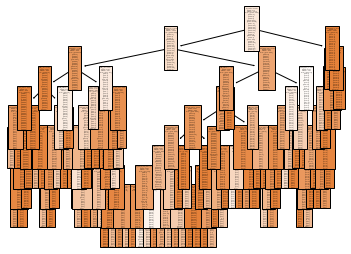

In [100]:
fn = df1.columns
cn=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,0.75), dpi=1000)
fig, axes = plt.subplots(nrows = 1,ncols = 1)#,figsize = (4,1), dpi=5000)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [90]:
df.type.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)